# ***This notebook contains all the tools I use for clustering machine learning problems***

In [29]:
#importing libraries'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set(style="darkgrid")

In [30]:
#importing the dataset
def generate_data(location:str,sample_number=10):
  data=pd.read_csv(location,engine='python')
  head=data.head()
  tail=data.tail()
  sample=data.sample(sample_number)
  description=data.describe()
  columns=data.columns
  info=data.info()
  shape=data.shape
  size=data.size
  return {'data':data,'head':head,'tail':tail,'sample':sample,'description':description,'columns':columns,'info':info,
          'shape':shape,'size':size}


In [31]:
data_set1=generate_data('/content/Air_Traffic_Passenger_Statistics.csv')
data_set2=generate_data('/content/total_data_na.csv')
data_set3=generate_data('/content/Mall_Customers.csv')
data_set4=generate_data('/content/CC GENERAL.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15007 entries, 0 to 15006
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              15007 non-null  int64 
 1   Operating Airline            15007 non-null  object
 2   Operating Airline IATA Code  14953 non-null  object
 3   Published Airline            15007 non-null  object
 4   Published Airline IATA Code  14953 non-null  object
 5   GEO Summary                  15007 non-null  object
 6   GEO Region                   15007 non-null  object
 7   Activity Type Code           15007 non-null  object
 8   Price Category Code          15007 non-null  object
 9   Terminal                     15007 non-null  object
 10  Boarding Area                15007 non-null  object
 11  Passenger Count              15007 non-null  int64 
 12  Adjusted Activity Type Code  15007 non-null  object
 13  Adjusted Passenger Count     15

In [62]:
data_set4=generate_data('/content/CC GENERAL.csv')
data4=data_set4['data']
data4=preprocess_data(data4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [32]:
data1=data_set1['data']
data2=data_set2['data']
data3=data_set3['data']
data4=data_set4['data']

In [ ]:
#analyzing the data
data_set1['head']


In [ ]:
data_set1['tail']

In [ ]:
data_set2['head']

In [ ]:
data_set2['tail']

In [ ]:
data_set1['description']

In [ ]:
data_set2['description']

In [ ]:
data_set1['columns']

In [ ]:
data_set2['columns']

In [ ]:
data_set3['columns']

In [ ]:
data_set3['head']

In [ ]:
data_set3['description']

In [16]:
#analyzing the datasets via a heat map to tudy the correlation between the features
def create_heat_map(data):
  #correalation between varaibles
  plt.figure(figsize=(18, 15))
  heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
  heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
  # save heatmap as .png file
  # dpi - sets the resolution of the saved image in dots/inches
  # bbox_inches - when set to 'tight' - does not allow the labels to be cropped
  plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')# this will will also return two dataset one being the original one and second one will be the one in


In [ ]:
#heat map for first dataset
create_heat_map(data1)

In [ ]:
#heat map for second dataset
create_heat_map(data2)
#since there are specific regions with high correlation density we can drop others if we want to

In [ ]:
create_heat_map(data3)

In [ ]:
create_data_map(data4)

In [33]:
#data preprocessing steps
def get_type(data):
  numeric=[]
  categorical=[]
  for col in data.columns:
    if data[f'{col}'].dtypes == 'object':
      categorical.append(col)
    else:
      numeric.append(col)
  return {'numeric':numeric,'categorical':categorical}

In [34]:
# check for null values and deal with them
# this function will take the type of process as well for both numeric and categorical data
def treat_null_values(data,numeric_type:str='mean'):
  types=get_type(data)
  numeric=types['numeric']
  categorical=types['categorical']
  if numeric_type == 'mean':
    for col in numeric:
      data[f'{col}']=data[f'{col}'].fillna(data[f'{col}'].mean())
  elif numeric_type == 'mode':
    for col in numeric:
      data[f'{col}']=data[f'{col}'].fillna(data[f'{col}'].mode())
  elif numeric_type == 'median':
    for col in numeric:
      data[f'{col}']=data[f'{col}'].fillna(data[f'{col}'].median())
  elif numeric_type == 'frequent':
    for col in numeric:
      data[f'{col}']=data[f'{col}'].fillna(data[f'{col}'].nunique[0])
  elif numeric_type == 'drop':
    for col in numeric:
      data[f'{col}']=data[f'{col}'].dropnna(inplace=True)
  elif numeric_type == 'predictive_modeling':
    pass # create a seprate function for this
  elif numeric_type == 'impute':
    pass # create a seprate function for this as well
  
  for col in categorical:
    most_frequent_category=data[f'{col}'].mode()[0]
    data[f'{col}'].fillna(most_frequent_category,inplace=True)
  return data

  

def predictive_modeling():
  pass #do a detailed study as disadvantages for this model usually outweights advantages
def multiple_imputation():
  from fancyimpute import IterativeImputer as MICE
  data= pd.DataFrame(MICE().fit_transform(data))
  return data

In [35]:
def encode_data(data,multiclass:str='One_hot',binary_class:str='Label'): #this function takes three args one is the data 2nd is the type of encoding for multiclass data and third is the encoding for binary class data
  categorical=get_type(data)['categorical']
  multivariate=[]
  bivariate=[]
  for col in categorical:
    if data[f'{col}'].nunique()>2:
      multivariate.append(col)
    else:
      bivariate.append(col)
  
  if multiclass == 'One_hot':
    for col in multivariate:
      data=encode_and_bind(data,col)
  if binary_class == 'Label':
    for col in bivariate:
      data=label_encode(data,col)
  # add other sorting techniques as well in here
  return data

def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res.pop(feature_to_encode)
    return(res)

def label_encode(data,col):
  from sklearn.preprocessing import LabelEncoder
  encoder=LabelEncoder()
  data[col]=encoder.fit_transform(data[col])
  return data
  
# this function needs to be modified therefore add differenr sort of encoding techniques as well in this cll

In [36]:
def treat_outliers(data,feature:str,algo:str='IQR',z_threshold:int=3,add_feature=None,remove:bool=False,scatter:bool=False,feature_x=None,feature_y=None): # this function takes two arguments one is data and 2ns is the algorithm
  pass
  if scatter == True:
    px.scatter(data,x=feature_x,y=feature_y,hover_name='Country')
  else:
    if algo == 'IQR':
      outlier_index=Inter_quantile_range(data,feature)
    if algo == 'EEA': # elliptic envelope algo
      outlier_index=Elliptice_envelope_algo(data,feature,add_feature)
    if algo == 'ISF': # Isolate forest algo
      outlier_index=Isolate_forest_algo(data,feature)
    if algo == 'One_classSVM': # one class svm
      outlier_index=One_class_SVM(data,feature)
    if algo == 'LOF':
      outlier_index=Local_factor_outlier(data,feature)
    if algo == 'Z_score':
      outlier_index=Z_score_algo(data,feature,z_threshold)
    print(outlier_index)
    if remove == True:
      data=remove_outliers(outlier_index,data)
    
    return data
    


# in all these function display the index of outliers

def Local_factor_outlier(data,feature):
  import numpy as np 
  from sklearn.neighbors import LocalOutlierFactor
  X=data[[feature,data.columns.values[-1]]]
  lof = LocalOutlierFactor(n_neighbors=20, algorithm='auto',
                         metric='minkowski', contamination=0.04,
                         novelty=False, n_jobs=-1)
  pred = lof.fit_predict(X)
  outlier_index = np.where(pred==-1)
  return outlier_index

def One_class_SVM(data,feature): #this returns novelty I am guessing so fuck this method
  import numpy as np
  from sklearn.svm import OneClassSVM
  X=data[[feature,data.columns.values[-1]]]
  one_class_svm = OneClassSVM(kernel='rbf', degree=3, gamma='scale')
  new_data = np.array([[-4, 8.5]])# change these values as per your dataset
  one_class_svm.fit(X)
  pred = one_class_svm.predict(new_data)
  outlier_index = np.where(pred==-1)
  return outlier_index

def Isolate_forest_algo(data,feature):
  import numpy as np
  from sklearn.ensemble import IsolationForest
  from sklearn.decomposition import PCA
  from sklearn.preprocessing import StandardScaler
  X=data[[feature,data.columns.values[-1]]]
   # Returns 1 of inliers, -1 for outliers
  iforest = IsolationForest(n_estimators=100, max_samples='auto', 
                          contamination=0.05, max_features=1.0, 
                          bootstrap=False, n_jobs=-1, random_state=1)
  pred = iforest.fit_predict(X)
 # Extract outliers
  outlier_index = np.where(pred==-1)
  return outlier_index

def Elliptice_envelope_algo(data,feature,add_feature):
  import numpy as np
  from sklearn.covariance import EllipticEnvelope
  elpenv = EllipticEnvelope(contamination=0.025, 
                          random_state=1)
  X=data[[feature,add_feature]]
# Returns 1 of inliers, -1 for outliers
  pred = elpenv.fit_predict(X)

# Extract outliers
  outlier_index = np.where(pred==-1)
  return outlier_index

def Inter_quantile_range(data,feature):
  Q1 = np.percentile(data[f'{feature}'], 25, interpolation = 'midpoint') 
  Q2 = np.percentile(data[f'{feature}'], 50, interpolation = 'midpoint') 
  Q3 = np.percentile(data[f'{feature}'], 75, interpolation = 'midpoint') 
  IQR = Q3 - Q1 
  low_lim = Q1 - 1.5 * IQR
  up_lim = Q3 + 1.5 * IQR
  outlier_index=[]
  for val in data[f'{feature}']:
    if val > up_lim or val <low_lim:
      outlier_index.append(data.index[data[f'{feature}'] == val].values[0])
  return outlier_index
         
def Z_score_algo(data,feature,z_threshold):
  mean = np.mean(data[f'{feature}'])
  std = np.std(data[f'{feature}'])
  print('mean of the dataset is', mean)
  print('std. deviation is', std)
  outlier_index = []
  for val in data[f'{feature}']:
    z = (val-mean)/std
    if z > z_threshold:
      outlier_index.append(data.index[data[f'{feature}'] == val].values[0])
  return outlier_index
  


# this function will remove the outliers if removal is allowed
def remove_outliers(index,data):
  for row in index:
    data.drop([row])
    print(f'dropped value at index {row}')
  return data

      

# if remove is true remove outliers else if it is false just return the index of outliers
# this will function will be returning two datasets the original one and one in which all the outliers are removed



In [37]:
#since we are not filtering for any dependent variable in the clustering therefore feature is not require
def preprocess_data(data):
  data=treat_null_values(data)
  data=encode_data(data)
  return data

# call outliers and balance function independentlu whenever you like and PS Fuck Roopa


In [38]:
def reduced_Dataset(data,reduction:int,method:str='PCA'):
  if method == 'PCA':
    return PCA(data,reduction)
 
  elif method == 'Kernel':
    return KernelPCA(data,reduction)

#go with pca since kernel pca might take quite  a long time
  


def PCA(data,reduction):
  from sklearn.decomposition import PCA
  pca=PCA(n_components=reduction)#n_component=reduced dimension of dataset
  reduced_data=pca.fit_transform(data)
  return reduced_data

def KernelPCA(data,reduction):
  from sklearn.decomposition import KernelPCA
  pca=KernelPCA(n_components=reduction,kernel='rbf')
  reduced_data=pca.fit_transform(data)
  return reduced_data



In [41]:
data1 = preprocess_data(data1)

In [42]:
data2 = preprocess_data(data2)

In [43]:
data3 = preprocess_data(data3)

In [44]:
data4 = preprocess_data(data4)

In [52]:
#reducing the preprocessed data
#reducing the dimension is a good idea sice some of the clustering algo requires heavy computation and therefore will most
#probably run out of resources
data1 = reduced_Dataset(data1,10)
data2 = reduced_Dataset(data2,10)

#not reducing dataset since they are of low dimensions
#data3 = reduced_Dataset(data3,10)
#data4 = reduced_Dataset(data4,20)

In [47]:
#these are the new dimensions of our data now
data1.shape

(15007, 10)

In [48]:
data2.shape

(143, 10)

In [49]:
data3.shape

(200, 5)

In [66]:
data4=pd.read_csv('/content/CC GENERAL.csv')
data4

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [67]:
#since custId is not so related to our problem statement therefore removing this field 
# but will use it later as one of the parametres in the 2d Axis
data4.drop(['CUST_ID'], axis = 1, inplace = True) 

In [69]:
#preproecessing the dataset with the cust_id column removd
data4=preprocess_data(data4)

In [70]:
#this is the preprocessed dataset
data4

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [71]:
#k-mean clustering

#radom initializtion trap is taken care of automatically since the algoo implemented is k-means++
def kmeansClustering(data,nClusters):
  from sklearn.cluster import KMeans
  kmeans = KMeans(n_clusters = nClusters, init = 'k-means++', random_state = 42)
  y_kmeans = kmeans.fit_predict(data)
  return y_kmeans
  

def elbowMethod(data,min:int=2,max:int=20):
  from sklearn.cluster import KMeans
  wcss = []#within cluster sum of squares we use this matrice to define the effciecy of model foer k number of clusters
  for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
  plt.plot(range(1, 11), wcss)
  plt.title('The Elbow Method')
  plt.xlabel('Number of clusters')
  plt.ylabel('WCSS')
  plt.show()

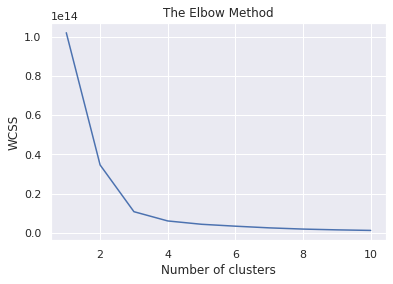

In [72]:
elbowMethod(data1)
#looking at the plot we can deduce that 3 is the idol choice for number of clusters we can alson try with 4

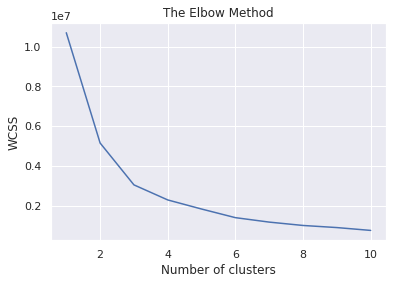

In [73]:
elbowMethod(data2)
#looking at the plot we can deduce that 3 is the idol choice for number of clusters we can alson try with 4

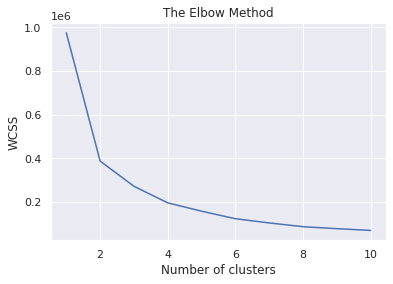

In [74]:
elbowMethod(data3)

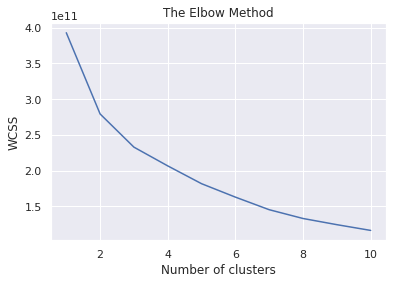

In [75]:
elbowMethod(data4)

In [96]:
kmeans_data1 = kmeansClustering(data1,2)

In [95]:
kmeans_data2 = kmeansClustering(data2,2)

In [78]:
kmeans_data3 = kmeansClustering(data3,3)

In [80]:
kmeans_data4 = kmeansClustering(data4,3),3#since 3 is the optimal value from the elbow method

In [ ]:
#implementing bisecting k-means cluster
# yet to find the implementation

In [81]:
#Hierarchial clustering
def HierarchialClustering(data,nClusters:int,affinity:str='euclidean',linkage:str='ward'):
  from sklearn.cluster import AgglomerativeClustering
  hc = AgglomerativeClustering(n_clusters = nClusters, affinity = affinity, linkage = linkage)
  y_hc = hc.fit_predict(data)
  return y_hc
def createDendogram(data):
  import scipy.cluster.hierarchy as sch
  dendrogram = sch.dendrogram(sch.linkage(data, method = 'ward'))
  # ward is the clusering techniique best suited for hierarchial clustering




  # ward stands for minimum variance
  plt.title('Dendrogram')
  plt.ylabel('Euclidean distances')
  plt.show()

In [ ]:
createDendogram(data1)
#in this the optimal number is 2

In [ ]:
createDendogram(data2)
#in this cluster the optimal number is 2

In [ ]:
createDendogram(data3)#optimal number of clusters in this case was 3

In [ ]:
createDendogram(data4)#optimal number of clusters in this case was 3

In [94]:
hierarchialData1 = HierarchialClustering(data1,2) #since 3 is the optimal number of clusters from the dendogram

In [93]:
hierarchialData2 = HierarchialClustering(data2,2)#since 3 is the optimal number of clusters from the dendogram

In [84]:
hierarchialData3 = HierarchialClustering(data3,3)#since 3 is the optimal number of clusters from the dendogram

In [85]:
hierarchialData4 = HierarchialClustering(data4,3)#since 3 is the optimal number of clusters from the dendogram

In [112]:
#Mean shift clustering
#note this algorithm is quite clumsy for large datasets
#finding the optimal value of the bandwidth => this will be tackled by the second function
#this requires heavy computational resources so either reduce the dataset first or run it in jupyter notebook
def meanShiftClustering(data):
  from sklearn.cluster import MeanShift
  bandwidth = bandwidthDetermination(data)#this function will give you the otimal value for the bandwidth
  clustering = MeanShift(n_jobs=-1,bandwidth=bandwidth)
  cluster = clustering.fit_predict(data) #this algo will be clumsy for a large dataset
  #runnig time is O(n2)
  return cluster


#this function will return the bandwidth value that will be used in the above function
def bandwidthDetermination(data):
  from sklearn.cluster import estimate_bandwidth
  bandwidth = estimate_bandwidth(data)#for large datasets this will take some time
  return bandwidth

meanShiftData1 = meanShiftClustering(data1)
meanShiftData2 = meanShiftClustering(data2)
meanShiftData3 = meanShiftClustering(data3)
meanShiftData4 = meanShiftClustering(data4)


#This is basicallyy a hybrid of kmeans and hierrarchial clustering

> Indented block

> Indented block

> Indented block






#ANd it is computationaly more efficient than regulat kmeans

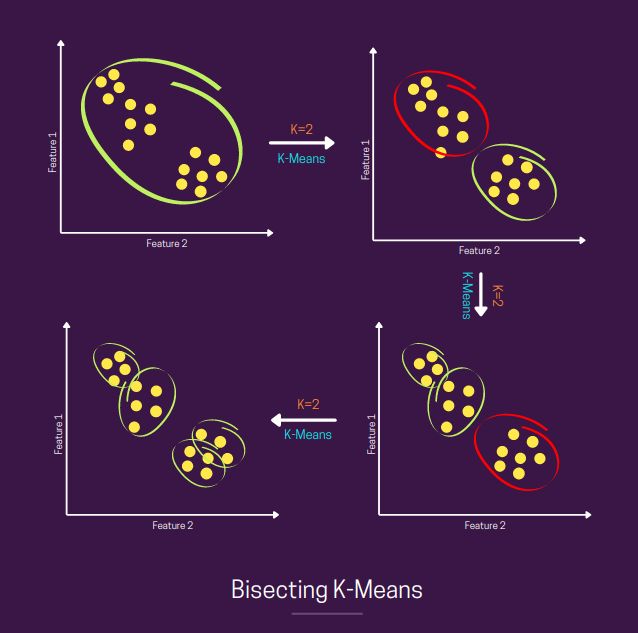

In [ ]:
#there is not a stable implementation of this algo in sklearn yet
#so we will be implementing it using pyspark
!pip install pyspark

In [ ]:
#maa chudae bc ye model
def  bisectingKmeans(data,nClusters:int):
  from pyspark.ml.clustering import BisectingKMeans
  from pyspark.ml.evaluation import ClusteringEvaluator
  #training the model
  bkm = BisectingKMeans().setK(nClusters).setSeed(1)#seed param?
  model = bkm.fit(data)
  # Make predictions
  predictions = model.transform(data)

  # Evaluate clustering by computing Silhouette score
  evaluator = ClusteringEvaluator()

  silhouette = evaluator.evaluate(predictions)
  print("Silhouette with squared euclidean distance = " + str(silhouette))
  # Shows the result.
  print("Cluster Centers: ")
  centers = model.clusterCenters()
  for center in centers:
    print(center)

In [87]:
#data bases spatial clustering of application with noise
#as the name suggest this model will work well on a noisy dataset
#DBSCAN 
def DBSCAN(data,epsillon:int,nNumber:int):
  from sklearn.cluster import DBSCAN
  clustering = DBSCAN(eps=epsillon,min_samples=nNumber)
  cluster = clustering.fit_predict(data)
  return cluster
  #how to plot it now?


#this function will generate the min number of points
def giveMinPoints(data):
  dimension=data.shape[1]
  # call the epsillon function as well in the first two conditions
  if dimension == 2:
    giveEpsillon(data,4)
    print(f"The min number of points {4}")
    return 4
  elif dimension > 2:
    giveEpsillon(data,2*dimension)
    return 2*dimension
    print(f'The min number of points {2*dimension}')
  else:
    return -1

#this function will generate epsillon
#this function is not sure to give best results since for large dataset the plot is not so clear
def giveEpsillon(data,neighbours:int):
  from sklearn.neighbors import NearestNeighbors
  neighbors = NearestNeighbors(n_neighbors=neighbours)
  neighbors_fit = neighbors.fit(data)
  distances, indices = neighbors_fit.kneighbors(data)
  distances = np.sort(distances, axis=0)
  distances = distances[:,1]
  plt.plot(distances)
  #make this more flexible for large datasets


In [ ]:
giveMinPoints(data1) #looking the graph the ideal epsilon value for data 2 is around 70
#as we can see in this graph there is a wide range of values that can be used as epsilon
#so in case of large dataset concluding epsilon value using this technique is not a good idea
#I guess
#so in this case the ideal epsilon value can range from 0 to 2000
#based on rule of thumb we should use 20 as min points but that does not make
#sense in a dataset with around 19k observations we shoulfd probably
#go with a higher value and than based on trial and error find the optimal
#value for the dataset

In [ ]:
giveMinPoints(data2) #looking the graph the ideal epsilon value for data 2 is around 70
#for this smaller dataset we can deduce the epsilon value by looking at the graph
#epsilon is the corresponding point to the most curvature point
#so in this case epsilon is around 70
#looing at this dataset since it has only 150 observations we can use
#20 as min number of points

In [ ]:
giveMinPoints(data3)#the epsilon value works okish in low dimension datasets but not so good / rather horrible for high dimension dataset

In [ ]:
giveMinPoints(data4)

In [ ]:
dbscanData2=DBSCAN(data2,70,20)

In [ ]:
dbscanData1=DBSCAN(data1,2000,4500)#yaar is there a way to find the optimal value of epsilon

In [ ]:
for val in dbscanData2:
  if val != -1:
    print(val)

Based on above observations we can conclude that finding the hyperparamtres of epsilon and min points for DBSCAN is easy in case of small dataset using these techniques but in case of large dataset we need to go with trial and error if one in thinking of implementing this model

# Min number of sample points

Minimum Samples (“MinPts”)
There is no automatic way to determine the MinPts value for DBSCAN. Ultimately, the MinPts value should be set using domain knowledge and familiarity with the data set. From some research I’ve done, here are a few rules of thumb for selecting the MinPts value:

1)The larger the data set, the larger the value of MinPts should be

2)If the data set is noisier, choose a larger value of MinPts
Generally, MinPts should be greater than or equal to the dimensionality of the data set

3)For 2-dimensional data, use DBSCAN’s default value of MinPts = 4 (Ester et al., 1996).

4)If your data has more than 2 dimensions, choose MinPts = 2*dim, where dim= the dimensions of your data set (Sander et al., 1998).

#Epsilon value
After you select your MinPts value, you can move on to determining ε. One technique to automatically determine the optimal ε value is described in this paper. This technique calculates the average distance between each point and its k nearest neighbors, where k = the MinPts value you selected. The average k-distances are then plotted in ascending order on a k-distance graph. You’ll find the optimal value for ε at the point of maximum curvature (i.e. where the graph has the greatest slope).

In [ ]:
#fuzzy c-mean clustering
#this is a more complex algo
#fuzzy partitio  is used and based on that fuzzy partition
#an equation is derived and our task is to minimize
#some variable in that equation


In [88]:
#minibatch kmeans algorithm
#we basically break the large dataset into small batches
# so that they can be allocated in memmory where as a large dataset can not be allocated into the memmory

def minBatchKmeans(data,nClusters:int,batchSize:int=10,max_iter:int=10):
  from sklearn.cluster import MiniBatchKMeans
  clustering = MiniBatchKMeans(n_clusters=nClusters,batch_size=batchSize,max_iter=max_iter,random_state=42)
  cluster=clustering.fit_predict(data)
  return cluster


In [114]:
minBatchData1=minBatchKmeans(data1,2)

In [115]:
minBatchData2=minBatchKmeans(data2,2)

In [116]:
minBatchData3 = minBatchKmeans(data3,3)

In [117]:
minBatchData4 = minBatchKmeans(data4,3)

In [ ]:
#affinity propogation
#clusters are formed by passing in messages between the data points
#this will probably run out of resources
def affinityPropogation(data):
  from sklearn.cluster import AffinityPropagation
  clustering=AffinityPropagation()
  cluster = clustering.fit_predict(data)
  return cluster

# This method consumes high resources therefore run it in local machine where you can allocate the sources

In [ ]:
affinityData1 = affinityPropogation(data1)
#it requires more resources for large dataset and will eventually run out of resources

In [ ]:
affinityData2 = affinityPropogation(data2)

In [ ]:
affinityData3 = affinityPropogation(data3)

# This algo works on graph data i.e the data should be connected and therefore will not work on normal data that is not connected

In [ ]:
#spectral
#we need to specify the number of ckusters in this case
#this algorithm has a lot of hyperparametres that we can optimize
#this algorithm can only be used with connected/graphed data so don't use it with
#normal data since normal dataset is not connected
def spectralClustering(data,nClusters:int=2):
  from sklearn.cluster import SpectralClustering
  clustering = SpectralClustering(n_clusters=nClusters,random_state=42,n_jobs=-1)
  cluster = clustering.fit_predict(data)
  return cluster

spectralData1 = spectralClustering(data4)
#gives error of fully connected database

In [101]:
#gaussian mixture models
#thia model can cluster non spherical data and it also
#it's always a good idea to reduce the dataset as it reduces the red flag variables in our dataset
def GMMClustering(data,nComponents:int=2):
  from sklearn.mixture import GaussianMixture
  clustering = GaussianMixture(n_components=nComponents,random_state=42)
  cluster = clustering.fit_predict(data)
  return cluster

GMMData1 = GMMClustering(data1)
GMMData2 = GMMClustering(data2)
GMMData3 = GMMClustering(data3)
GMMData4 = GMMClustering(data4)

In [ ]:
#optics clustering model
#this too requires epsilon value so fuck this model
def opticsClustering(data,epsilon):
  from sklearn.cluster import OPTICS, cluster_optics_dbscan
  minSamples = giveMinPoints(data)
  optics_model = OPTICS(min_samples = minSamples)
  optics_model.fit(data)  
   # Producing the labels according to the DBSCAN technique 
  labels = cluster_optics_dbscan(reachability = optics_model.reachability_,
                                   core_distances = optics_model.core_distances_,
                                   ordering = optics_model.ordering_, eps = epsilon)

  labels = optics_model.labels_[optics_model.ordering_]  
  return labels


In [ ]:
opticsData1 = opticsClustering(data1,2000)#this value of epsilon is giving false results so go with trial and error
#yaar isn't there any way of finding the optimal value for epsilon
opticsData2 = opticsClustering(data2,70)

In [102]:
def birchAlgo(data,nClusters:int=3):
  from sklearn.cluster import Birch
  clustering = Birch(n_clusters = nClusters)#ooh ma good turu lobh
  cluster = clustering.fit_predict(data)
  return cluster


birchData1 = birchAlgo(data1)
birchData2 = birchAlgo(data2)
birchData3 = birchAlgo(data3)
birchData4 = birchAlgo(data4)

In [ ]:
!pip install hdbscan

In [ ]:
#last clustering algo finish it then proceed with visualization
#  It extends DBSCAN by converting it into a hierarchical clustering algorithm, 
#  and then using a technique to extract a flat clustering based in the stability of clusters.
def HDBCANClustering(data):
  import hdbscan 
  clustering = hdbscan.HDBSCAN()
  cluster = clustering.fit(data)
  return cluster.labels_
#yaar isn't there any way for finding the optimal value for epsilon
HDBSCANData1=HDBCANClustering(data1)
HDBSCANData2=HDBCANClustering(data2)

#Note use these algo only of you know the idol value for epsilong and min number of points
#these algos are good but if you don't know the idol value for epsilon
# dont use these models

#1)DBSCAN

#2)OPTICS

#3)HDBSCAN

#in this section excluding dbscan realted models since the idol value of espilon value is not found yet for the larger dataset i.e airplane dataset

In [119]:
#visualizing the clusters
#for cluster visualiztion we need to reduce our data to two independet data points
#we are creating new dataframes

newKmeans1 = pd.read_csv('/content/Air_Traffic_Passenger_Statistics.csv')
newKmeans2 = pd.read_csv('/content/total_data_na.csv')
newKmeans3 = pd.read_csv('/content/Mall_Customers.csv')
newKmeans4 = pd.read_csv('/content/CC GENERAL.csv')
newHierarchial1 =  pd.read_csv('/content/Air_Traffic_Passenger_Statistics.csv')
newHierarchial2 =  pd.read_csv('/content/total_data_na.csv')
newHierarchial3 = pd.read_csv('/content/Mall_Customers.csv')
newHierarchial4 = pd.read_csv('/content/CC GENERAL.csv')
newMeanShift1 =  pd.read_csv('/content/Air_Traffic_Passenger_Statistics.csv')
newMeanShift2 =  pd.read_csv('/content/total_data_na.csv')
newMeanShift3 = pd.read_csv('/content/Mall_Customers.csv')
newMeanShift4 = pd.read_csv('/content/CC GENERAL.csv')
newMinBatchk1 =  pd.read_csv('/content/Air_Traffic_Passenger_Statistics.csv')
newMinBatchk2 =  pd.read_csv('/content/total_data_na.csv')
newMinBatchk3 = pd.read_csv('/content/Mall_Customers.csv')
newMinBatchk4 = pd.read_csv('/content/CC GENERAL.csv')
newBirch1 =  pd.read_csv('/content/Air_Traffic_Passenger_Statistics.csv')
newBirch2 =  pd.read_csv('/content/total_data_na.csv')
newBirch3 = pd.read_csv('/content/Mall_Customers.csv')
newBirch4 = pd.read_csv('/content/CC GENERAL.csv')
newKmeans1.insert(newKmeans1.shape[1],'Cluster',kmeans_data1)  #here we are inserting the clusters column as the last field of the dataset
newKmeans2.insert(newKmeans2.shape[1],'Cluster',kmeans_data2)
newKmeans3.insert(newKmeans3.shape[1],'Cluster',kmeans_data3)
#newKmeans4.insert(newKmeans4.shape[1],'Cluster',kmeans_data4)
newHierarchial1.insert(newHierarchial1.shape[1],'Cluster',hierarchialData1)
newHierarchial2.insert(newHierarchial2.shape[1],'Cluster',hierarchialData2)
newHierarchial3.insert(newHierarchial3.shape[1],'Cluster',hierarchialData3)
newHierarchial4.insert(newHierarchial4.shape[1],'Cluster',hierarchialData4)
newMeanShift1.insert(newMeanShift1.shape[1],'Cluster',meanShiftData1)
newMeanShift2.insert(newMeanShift2.shape[1],'Cluster',meanShiftData2)
newMeanShift3.insert(newMeanShift3.shape[1],'Cluster',meanShiftData3)
newMeanShift4.insert(newMeanShift4.shape[1],'Cluster',meanShiftData4)
#newMinBatchk1.insert(newMinBatchk1.shape[1],'Cluster',minBatchData1)
#newMinBatchk2.insert(newMinBatchk2.shape[1],'Cluster',minBatchData2)
newMinBatchk3.insert(newMinBatchk3.shape[1],'Cluster',minBatchData3)
newMinBatchk4.insert(newMinBatchk4.shape[1],'Cluster',minBatchData4)
newBirch1.insert(newBirch1.shape[1],'Cluster',birchData1)
newBirch2.insert(newBirch2.shape[1],'Cluster',birchData2)
newBirch3.insert(newBirch3.shape[1],'Cluster',birchData3)
newBirch4.insert(newBirch4.shape[1],'Cluster',birchData4)

In [120]:
#in this section you can generate a new dataframe of dimension Nx3 to visualize the clusters
#the thing with  this is that some of the columns do not participate in cluster formation and some do since we applies dimensionality reduction
def generateDataframe(data,feature1,feature2):
  #generating new dataset
  feature1Data = data[feature1]
  feature2Data = data[feature2]
  cluster = data['Cluster']

  index=[]
  for i in range(0,data.shape[0]):
    index.append(i)

  columns = [feature1,feature2,'Cluster']


  data = []
  for feat1,feat2,label in zip(feature1Data,feature2Data,cluster):
    data.append([feat1,feat2,label])

  newData=pd.DataFrame(data=data,index=index,columns=columns)
  return newData


In [109]:
print('THis is the columns available in the first dataset1:')
for column in newBirch1.columns:
  print(column)

THis is the columns available in the first dataset1:
Activity Period
Operating Airline
Operating Airline IATA Code
Published Airline
Published Airline IATA Code
GEO Summary
GEO Region
Activity Type Code
Price Category Code
Terminal
Boarding Area
Passenger Count
Adjusted Activity Type Code
Adjusted Passenger Count
Year
Month
Cluster


In [110]:
print('THis is the columns available in the second dataset1:')
for column in newBirch2.columns:
  print(column)

THis is the columns available in the second dataset1:
PLAYER
Mat.x
Inns.x
NO
Runs.x
HS
Avg.x
BF
SR.x
X100
X50
X4s
X6s
Mat.y
Inns.y
Ov
Runs.y
Wkts
BBI
Avg.y
Econ
SR.y
X4w
X5w
y
Cluster


In [137]:
print('THis is the columns available in the second dataset1:')
for column in newBirch3.columns:
  print(column)

THis is the columns available in the second dataset1:
CustomerID
Genre
Age
Annual Income (k$)
Spending Score (1-100)
Cluster


In [138]:
print('THis is the columns available in the second dataset1:')
for column in newBirch4.columns:
  print(column)

THis is the columns available in the second dataset1:
CUST_ID
BALANCE
BALANCE_FREQUENCY
PURCHASES
ONEOFF_PURCHASES
INSTALLMENTS_PURCHASES
CASH_ADVANCE
PURCHASES_FREQUENCY
ONEOFF_PURCHASES_FREQUENCY
PURCHASES_INSTALLMENTS_FREQUENCY
CASH_ADVANCE_FREQUENCY
CASH_ADVANCE_TRX
PURCHASES_TRX
CREDIT_LIMIT
PAYMENTS
MINIMUM_PAYMENTS
PRC_FULL_PAYMENT
TENURE
Cluster


In [144]:
#this is the visualization dataset

#kmeans dataseet
Kmeans1=generateDataframe(newKmeans1,'Operating Airline','Passenger Count')
Kmeans2=generateDataframe(newKmeans2,'Inns.x','Avg.x')
Kmeans3=generateDataframe(newKmeans3,'Genre','Age')
#Kmeans4=generateDataframe(newKmeans4,'BALANCE','PURCHASES')
#hierarchial dataset
Hierarchial1=generateDataframe(newHierarchial1,'Operating Airline','Passenger Count')
Hierarchial2=generateDataframe(newHierarchial2,'Inns.x','Avg.x')
Hierarchial3=generateDataframe(newHierarchial3,'Genre','Age')
Hierarchial4=generateDataframe(newHierarchial4,'BALANCE','PURCHASES')

#min batch dataset
MinBatch1=generateDataframe(newMeanShift1,'Operating Airline','Passenger Count')
MinBatch2=generateDataframe(newMeanShift2,'Inns.x','Avg.x')
MinBatch3=generateDataframe(newMeanShift3,'Genre','Age')
MinBatch4=generateDataframe(newMeanShift4,'BALANCE','PURCHASES')

#meanShift dataset
#meanShift1=generateDataframe(newMinBatchk1,'GEO Region','Price Category Code')
#meanShift2=generateDataframe(newMinBatchk2,'Inns.x','Avg.x')

#birch dataset
Birch1=generateDataframe(newBirch1,'Operating Airline','Passenger Count')
Birch2=generateDataframe(newBirch2,'Inns.x','Avg.x')
Birch3=generateDataframe(newBirch3,'Genre','Age')
Birch4=generateDataframe(newBirch4,'BALANCE','PURCHASES')




KeyError: ignored

In [123]:
#creating the new dataframe with only three features one being the cluster itself

#these are all the colors which we will use to represent the clusters

colors = ['red','blue','magenta','green','cadetblue','chartreuse',
          'chocolate','coral','cornflowerblue','cornsilk','crimson',
          'cyan','darkblue','darkcyan','darkgoldenrod','darkgray'
          ,'dodgerblue','firebrick','floralwhite','forestgreen',
          'fuchsia','gainsboro','ghostwhite','gold','goldenrod','gray','greenyellow',
          'honeydew','hotpink','linen',
          'maroon','mediumaquamarine','olivedrab','tan','teal','thistle','tomato','turquoise','violet',
          'wheat','white','whitesmoke','yellowgreen''antiquewhite','aqua','aquamarine',
          'azure','beige','bisque','black','blanchedalmond',
          'blueviolet','brown','burlywood','indianred',
          'mintcream','mistyrose','moccasin','navajowhite','navy','oldlace','olive','darkmagenta','darkolivegreen',
          'darkorange','darkorchid','indigo','ivory','khaki','lavender','lavenderblush',
          'lawngreen','lemonchiffon','lightblue','lightcoral','darkgreen','darkturquoise','darkviolet','deeppink'
          ,'deepskyblue','dimgray','lightcyan','lightgoldenrodyellow',
          'lightgreen','lightgray','lightpink','lightsalmon','lightseagreen','lightskyblue',
          'lightslategray','lightsteelblue','lightyellow','lime','limegreen',
          'orange','orangered','orchid','palegoldenrod','palegreen','paleturquoise','palevioletred',
          'papayawhip','peachpuff','peru','pink','plum','powderblue','purple','aliceblue','rosybrown','royalblue',
          'saddlebrown','salmon','sandybrown','seagreen','seashell','sienna','silver','skyblue','slateblue',
          'slategray','snow','springgreen','steelblue','yellow',]



# IN this section we will be visualizing the clusters using two features and one label column we will polt a 2d visulization of the clusters 

In [124]:
#visualizing our created cluserts by using newly created dataframes with only three features two for axis and one being the cluster column itself

def createClusterVisualization(data): #this function expects our newly created dataframe of type NX3
  xAxis = data.columns[0] #this is our first feature with highest correlation
  yAxis = data.columns[1]# this is our second feature with second highest correlation
  numClusters = data['Cluster'].nunique()
  plt.figure(figsize=(20,10))
  for i in range (0,numClusters):
    x=[]
    y=[]
    for index,row in data.iterrows():
      if row['Cluster'] == i:
        x.append(row[xAxis])
        y.append(row[yAxis])
    plt.scatter(x,y, s = 100, c = colors[i], label = f'Cluster {i}')
  plt.title('Clusters formed')
  plt.xlabel(xAxis) 
  plt.ylabel(yAxis)
  plt.legend()
  plt.show()

  #need to add centriods of clusters as well




# plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
# plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
# plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
# plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
# plt.title('Clusters of customers')
# plt.xlabel('Annual Income (k$)')
# plt.ylabel('Spending Score (1-100)')
# plt.legend()
# plt.show()



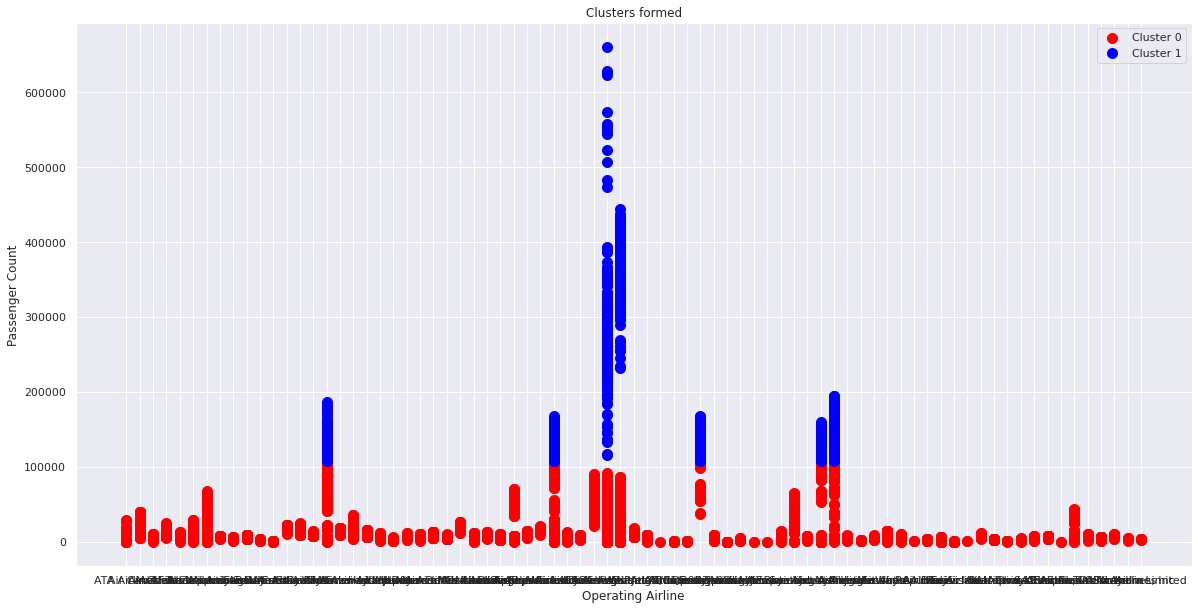

In [129]:
createClusterVisualization(Kmeans1)

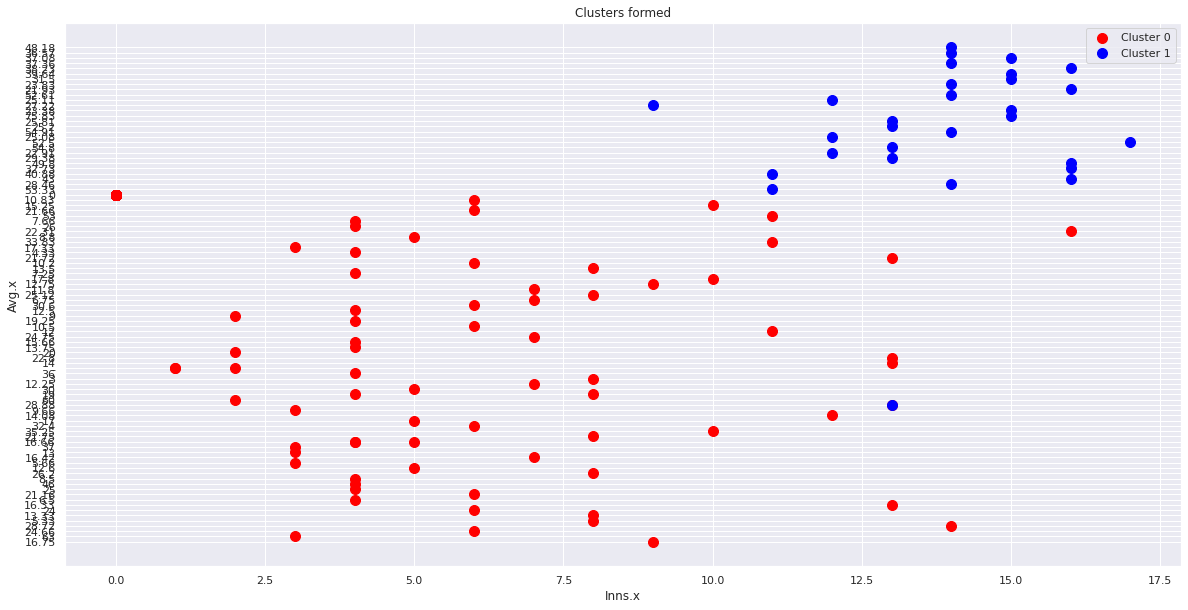

In [130]:
createClusterVisualization(Kmeans2)

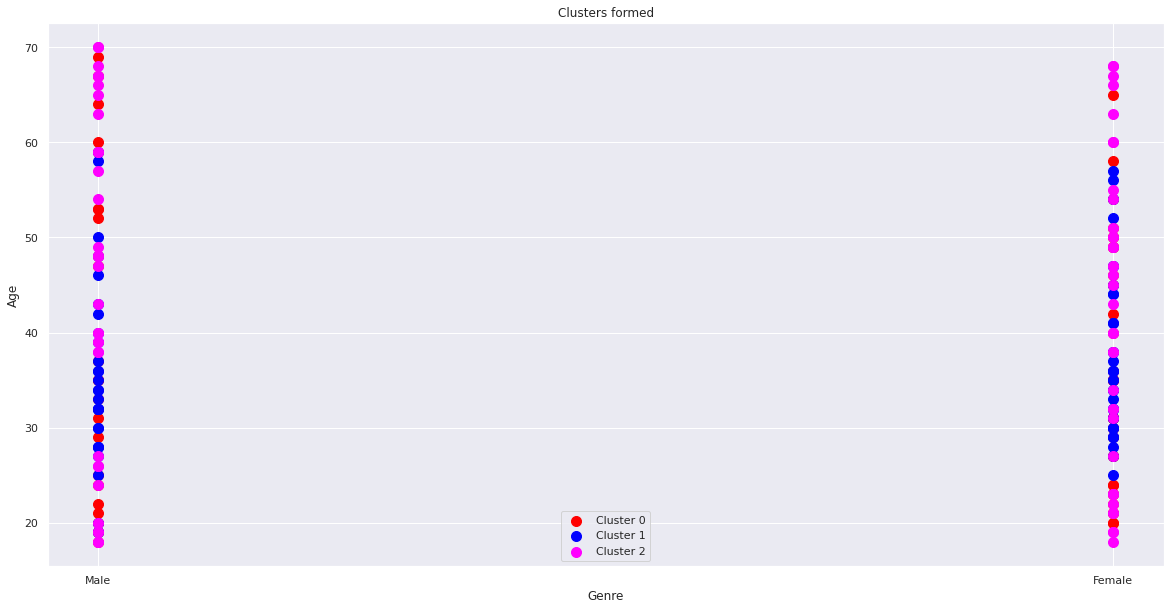

In [143]:
createClusterVisualization(Kmeans3)

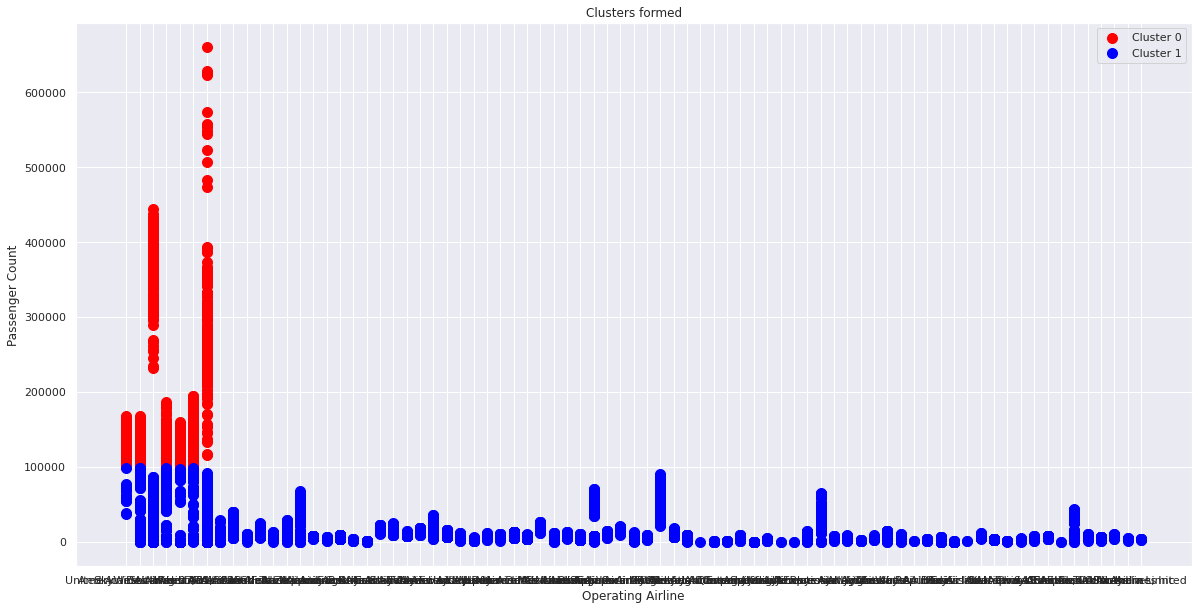

In [131]:
createClusterVisualization(Hierarchial1)

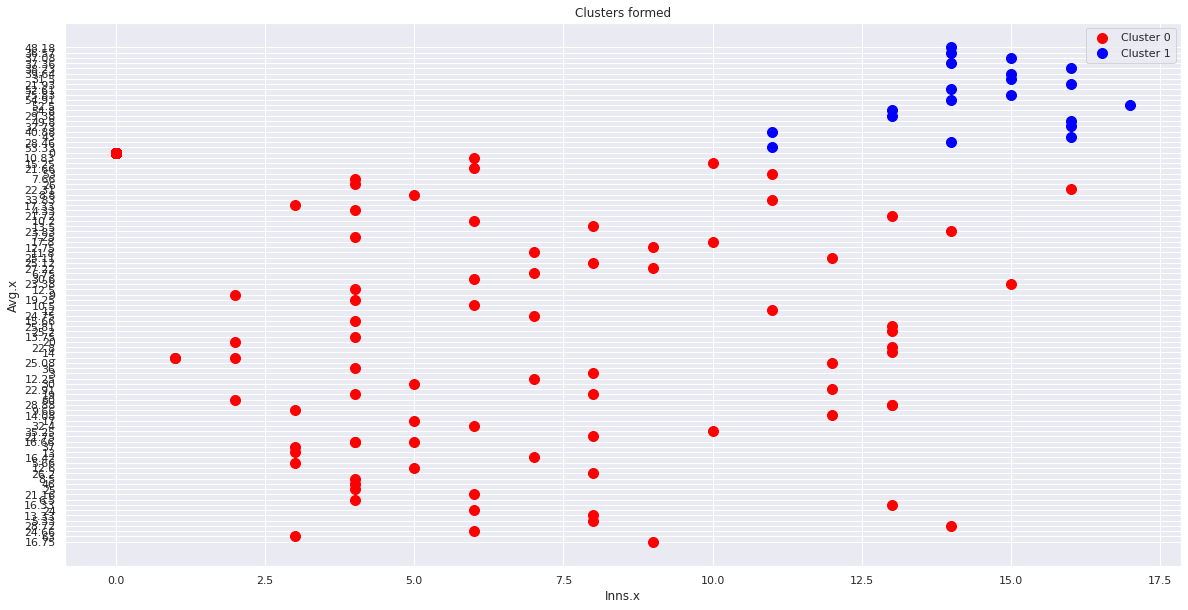

In [132]:
createClusterVisualization(Hierarchial2)

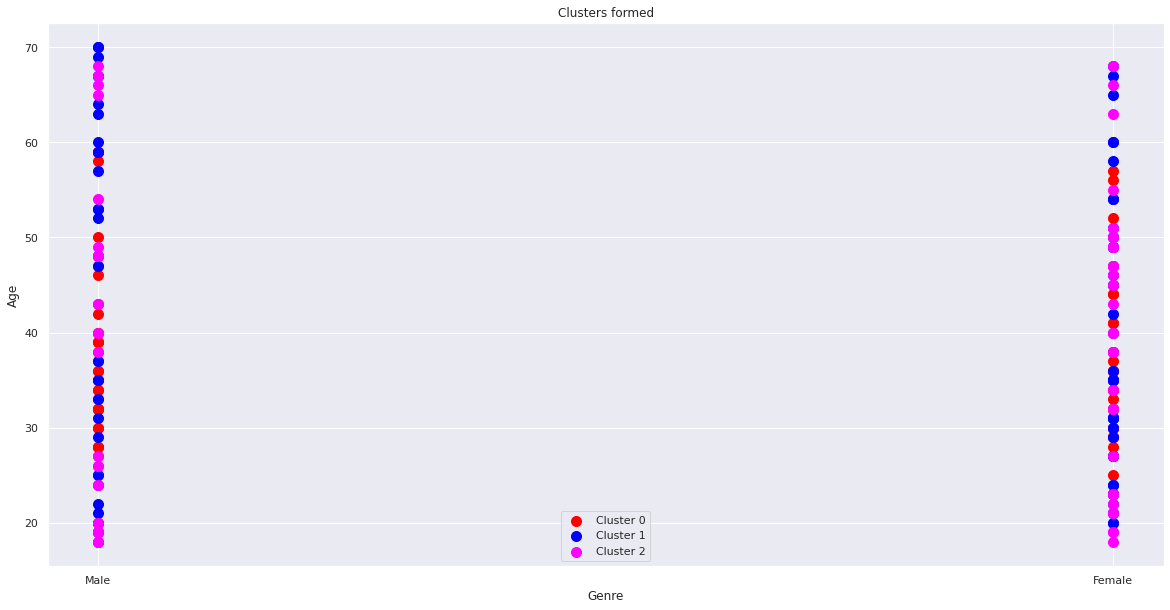

In [146]:
createClusterVisualization(Hierarchial3)

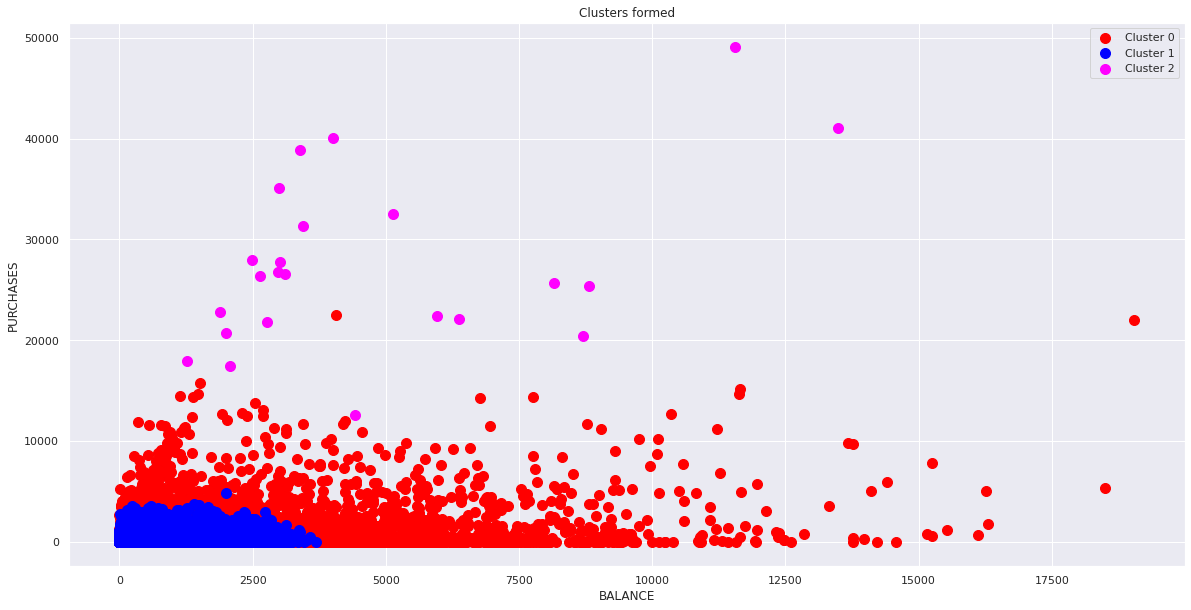

In [147]:
createClusterVisualization(Hierarchial4)

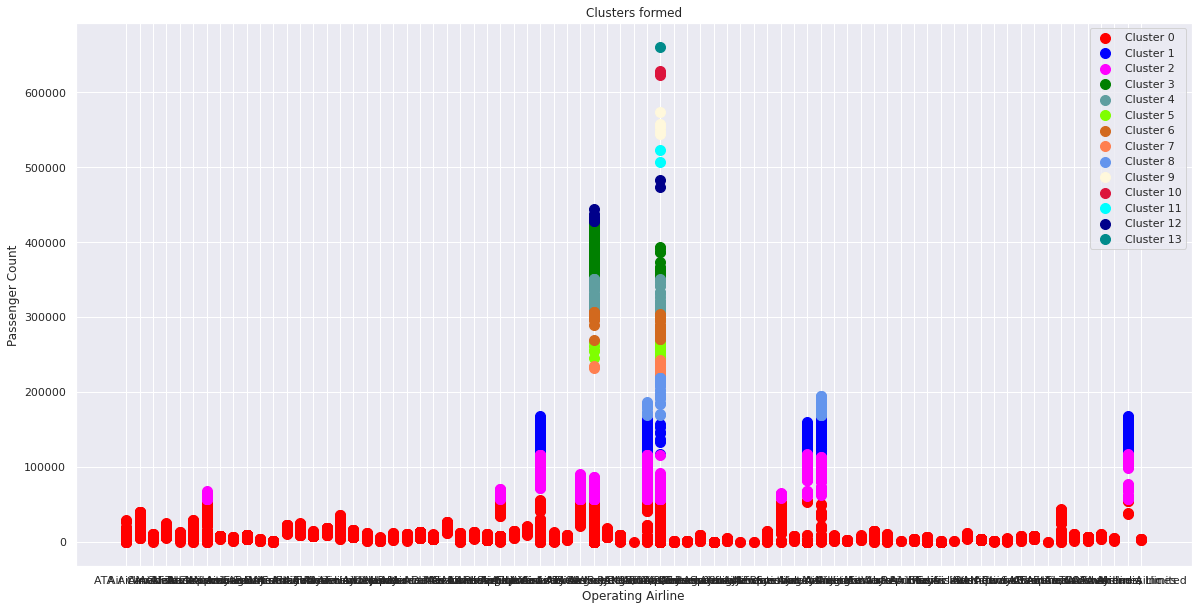

In [133]:
createClusterVisualization(MinBatch1)

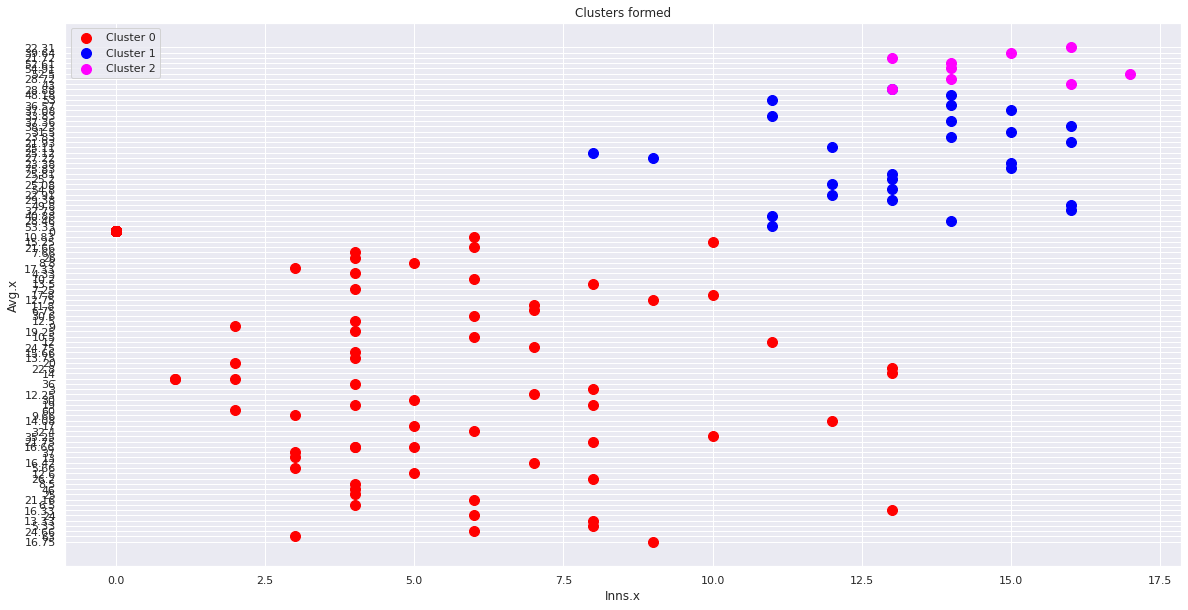

In [134]:
createClusterVisualization(MinBatch2)

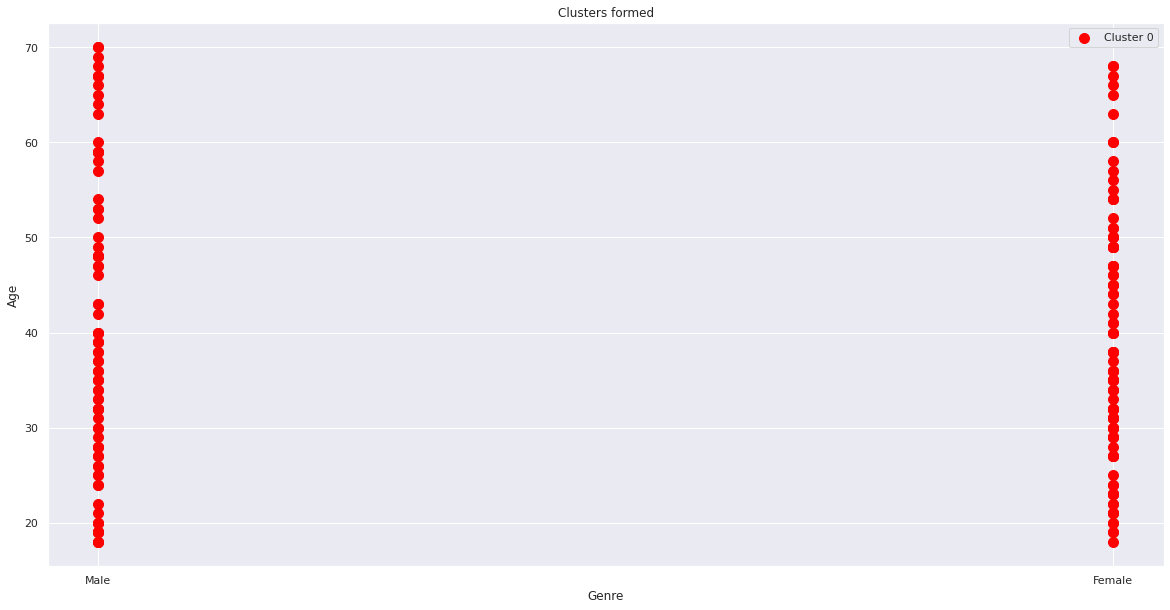

In [148]:
createClusterVisualization(MinBatch3)

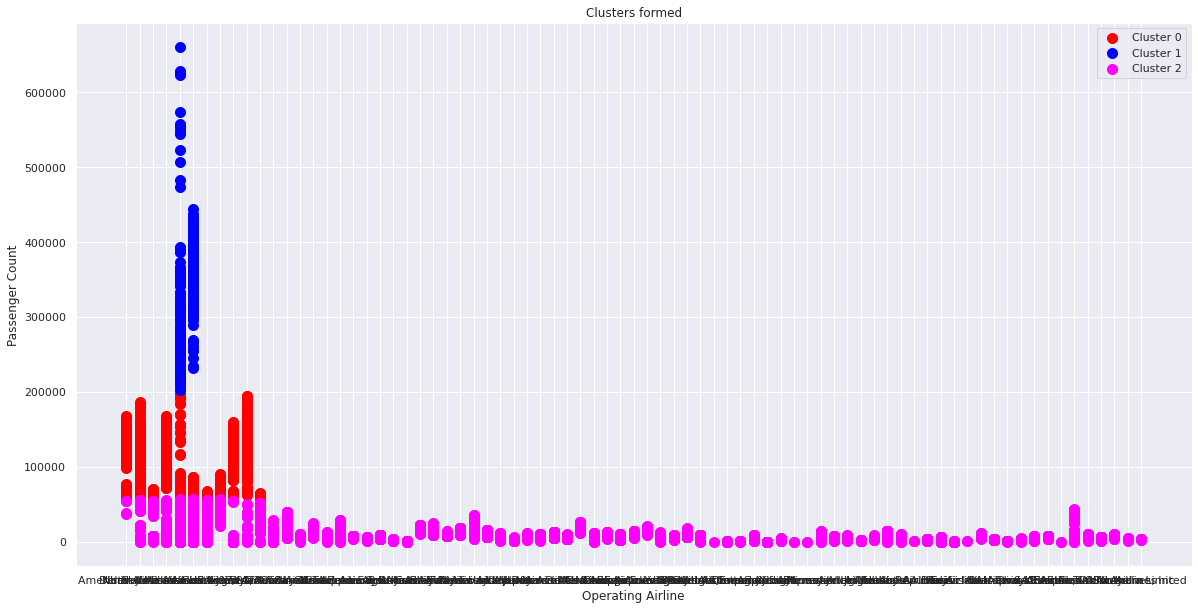

In [135]:
createClusterVisualization(Birch1)

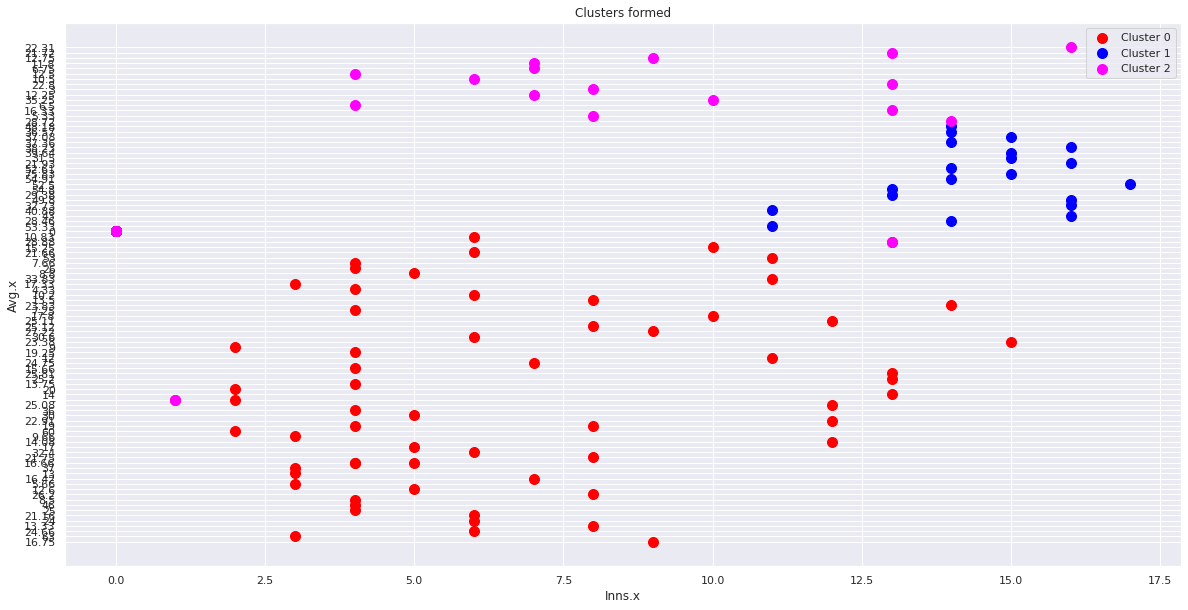

In [136]:
createClusterVisualization(Birch2)

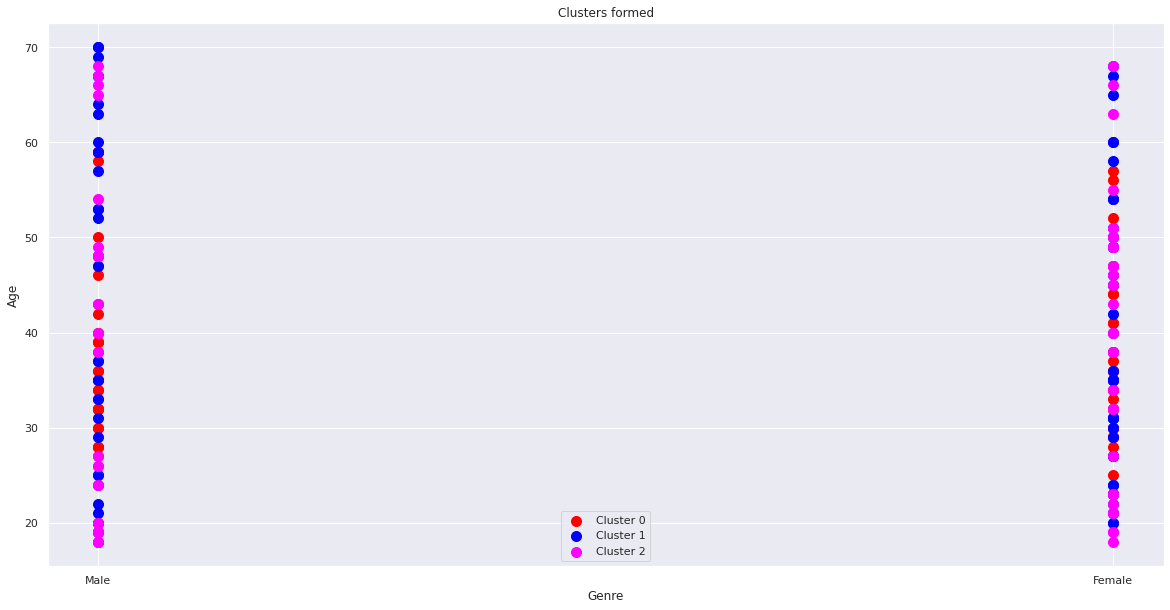

In [150]:
createClusterVisualization(Birch3)

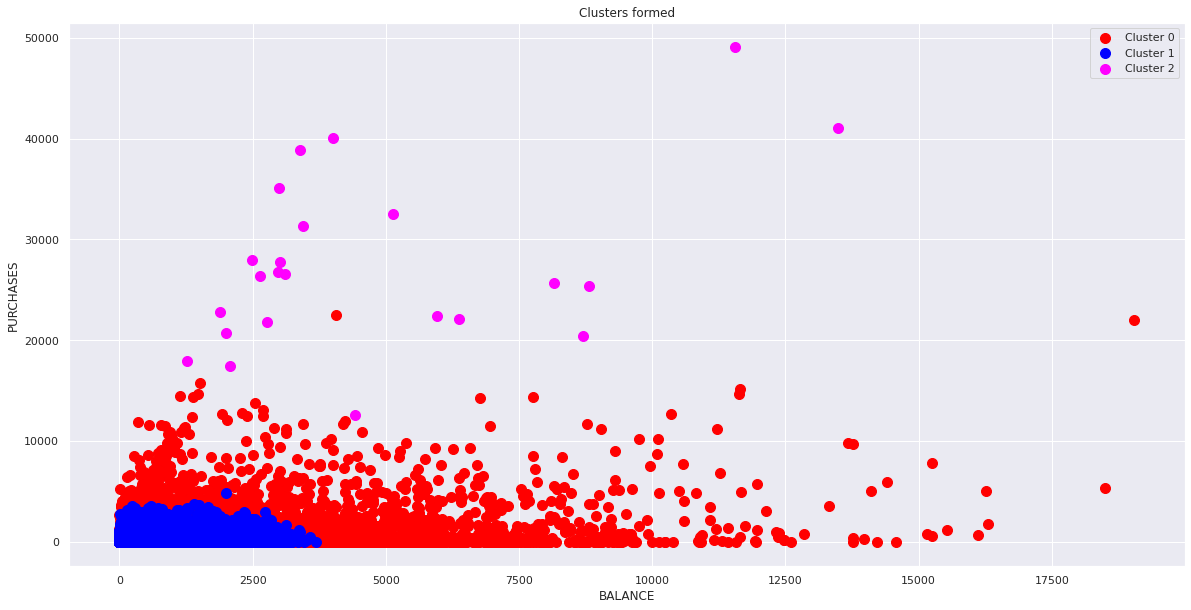

In [151]:
createClusterVisualization(Birch4)

# This section deals with the hyperparametre optimization of the models
#to be contiuned study all the models again

#This section is used for model evaluation and how well our model clusterd the given datasets based on 

#These are the two matrices for clustering model evaluation

#1)Silhouette Coefficient:
The Silhouette Coefficient is defined for each sample and is composed of two scores:
a: The mean distance between a sample and all other points in the same cluster.
b: The mean distance between a sample and all other points in the next nearest cluster.

The Silhouette Coefficient for a set of samples is given as the mean of the Silhouette Coefficient for each sample. The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters. **The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.**

#2)Dunn’s Index:
Dunn’s Index (DI) is another metric for evaluating a clustering algorithm. Dunn’s Index is equal to the minimum inter-cluster distance divided by the maximum cluster size. Note that large inter-cluster distances (better separation) and smaller cluster sizes (more compact clusters) lead to a higher DI value.

**A higher DI implies better clustering. It assumes that better clustering means that clusters are compact and well-separated from other clusters.**

In [ ]:
#evaluating models based on silhoute coefficient


In [ ]:
#evaluating models based on the Dunn coefficient